# Pymaceuticals Inc.
---

### Analysis


- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
mouse_study_complete = pd.merge(study_results, mouse_metadata, how = "left", on=["Mouse ID"])
# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice.

mouse_count = len(mouse_study_complete["Mouse ID"].unique())

print(mouse_count)

249


In [31]:
#mouse_duplicates = mouse_study_complete[mouse_study_complete[["Mouse ID","Timepoint"]].duplicated()]

mouse_duplicates = mouse_study_complete[mouse_study_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]

mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
mouse_study_complete = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] != "g989"]

In [33]:
print(len(mouse_study_complete["Mouse ID"].unique()))

248


In [34]:
#summary_df = mouse_study_complete.set_index(["Drug Regimen"])

#summary_df = summary_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

#summary_df

mean_tumor_size = mouse_study_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_size = mouse_study_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_size_variance = mouse_study_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_size_std_dev = mouse_study_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_size_std_err = mouse_study_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_size_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [35]:
data_summary = {"Mean Tumor Size": mean_tumor_size,
                 "Median Tumor Size": median_tumor_size,
                 "Tumor Size Variance": tumor_size_variance,
                 "Tumor Size Std. Dev.": tumor_size_std_dev,
                 "Tumor Size Std. Err.": tumor_size_std_err}

summary_df = pd.DataFrame(data_summary)

summary_df

,Mean Tumor Size,Median Tumor Size,Tumor Size Variance,Tumor Size Std. Dev.,Tumor Size Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [36]:
# Using the aggregation method, produce the same summary statistics in a single line.

aggregate_df = mouse_study_complete.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)":['mean','median','var','std','sem']})

aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

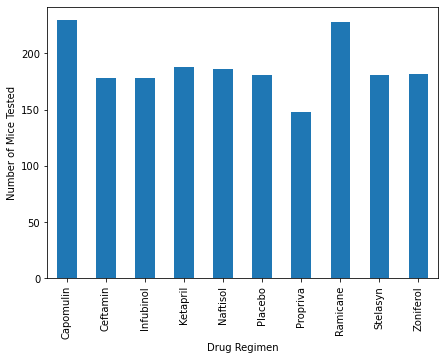

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = mouse_study_complete.groupby(["Drug Regimen"]).count()["Timepoint"]

total_timepoints

total_timepoints.plot(kind="bar", figsize=(7,5))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

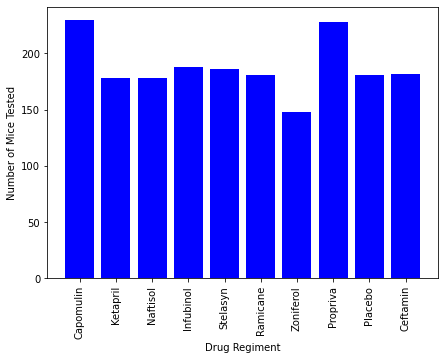

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimens = mouse_study_complete["Drug Regimen"].unique()
timepoints = mouse_study_complete.groupby(["Drug Regimen"]).count()["Timepoint"]
x_axis = np.arange(len(drug_regimens))

plt.figure(figsize=(7,5))
plt.bar(x_axis,timepoints,align="center",color="blue")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_regimens,rotation=90)

plt.xlabel("Drug Regiment")
plt.ylabel("Number of Mice Tested")

plt.show()